# Linear_Regression_from_Text_Minibatch with Tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Read the data file
Linear_Regression_from_Text_Minibatch with Tensorflow.ipynb <br>
data <br>
└──── birth_life_2010.txt <br>

+ birth_life_2010.txt

| Country | Birth rate | Life expectancy |
|---------|------------|-----------------|
| Vietnam | 1.822      | 74.828243902    |
| Vanuatu | 3.869      | 70.819487805    |
| ...     | ...        | ...             |


In [2]:
DATA_FILE = "./data/birth_life_2010.txt"

In [3]:
batch_size = 10
n_epoch = 1000

In [4]:
def read_birth_file_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """        
    "readline from 1 row (except 0 row : category)"
    text = open(filename, 'r').readlines()[1:]   
    "Split each line with '\t'"
    data = [line[:-1].split('\t') for line in text]
    "Select the column 1 of birth"
    births = [float(line[1]) for line in data]
    "Select the column 2 of lifes"
    lifes = [float(line[2]) for line in data]
    "Zip birth & lifes"
    data = list(zip(births, lifes))
    "The number of samples"
    n_samples = len(data)
    "Transform data type from list to np.array"
    data = np.asarray(data, dtype=np.float32)
    
    return data, n_samples

### Step 1 : read in data from the .txt file

In [5]:
data, n_samples = read_birth_file_data(DATA_FILE)

### Step 2 : create placeholders for X (birth rate) and Y (life expectancy)

In [6]:
X = tf.placeholder(tf.float32, [None,], name = "X")
Y = tf.placeholder(tf.float32, [None,], name = "Y")

### Step 3 : create weight and bias, initialized to 0

In [7]:
w = tf.get_variable("weights", initializer = tf.constant(0.0))
b = tf.get_variable("bias", initializer= tf.constant(0.0))

### Step 4 : build model to predict Y

In [8]:
hypothesis = w * X + b

### Step 5 : use the squared error as the loss function

In [9]:
loss = tf.reduce_mean(tf.square(hypothesis - Y), name = "loss")

### Step 6 : using gradient descent with learning rate of 0.001 to minimize loss

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

### Step 7, 8, 9 : 

In [11]:
writer = tf.summary.FileWriter("./graphs/linear_reg_minibatch", tf.get_default_graph())
with tf.Session() as sess:
    # Step 7 : initialize the necessary variables, in this case, w and b 
    sess.run(tf.global_variables_initializer())
    
    total_batch = int(n_samples / batch_size)
    
    # Step 8 : train the model for 100 epoch
    for epoch in range(n_epoch):
        total_loss = 0
        for i in range(total_batch):
            x_data = data[i*batch_size: (i+1)*batch_size, 0]
            y_data = data[i*batch_size: (i+1)*batch_size, 1]
            
            # Session execute optimizer and fetch values of loss
            _, _loss = sess.run([optimizer, loss], feed_dict = {X:x_data, Y:y_data})
            total_loss += _loss
        if epoch % 10 == 0:
            print("Epoch {0} : {1}".format(epoch, total_loss / total_batch))
        
    #close the writer when you're done using it
    writer.close()
    
    # Step 9 : output the values of w and b
    w_out, b_out = sess.run([w, b])

Epoch 0 : 3873.261664139597
Epoch 10 : 1177.9284186112254
Epoch 20 : 1021.8864087556537
Epoch 30 : 890.0951409590872
Epoch 40 : 775.8602037931744
Epoch 50 : 676.8043333354749
Epoch 60 : 590.9107232344778
Epoch 70 : 516.4300199809827
Epoch 80 : 451.84580913342927
Epoch 90 : 395.84292763157896
Epoch 100 : 347.2815310829564
Epoch 110 : 305.17327680085833
Epoch 120 : 268.660385533383
Epoch 130 : 236.99898047196237
Epoch 140 : 209.54497929623253
Epoch 150 : 185.73920280054995
Epoch 160 : 165.096669648823
Epoch 170 : 147.19749892385383
Epoch 180 : 131.67683390567177
Epoch 190 : 118.2189413371839
Epoch 200 : 106.54922525506271
Epoch 210 : 96.43009768034283
Epoch 220 : 87.65597775107936
Epoch 230 : 80.04791420384457
Epoch 240 : 73.4511698672646
Epoch 250 : 67.73079420390881
Epoch 260 : 62.77094068025288
Epoch 270 : 58.47038409584447
Epoch 280 : 54.74108866641396
Epoch 290 : 51.50764425177323
Epoch 300 : 48.704090319181745
Epoch 310 : 46.273195567883946
Epoch 320 : 44.165450748644375
Epoch 330 

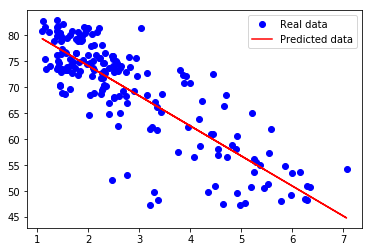

In [12]:
plt.plot(data[:,0], data[:,1], 'bo', label = 'Real data')
plt.plot(data[:,0], data[:,0]* w_out + b_out, 'r', label = "Predicted data")
plt.legend()
plt.show()